## 1-1. Daum 뉴스제목 가져오기
* user-agent 요청헤더를 반드시 설정해야 한다.

In [ ]:
import requests
from bs4 import BeautifulSoup

# 다음 경제 뉴스 URL
url = 'https://news.daum.net/economy'

print(url)

# 요청 헤더
req_header = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36'
}

res = requests.get(url, headers=req_header)
print(type(res))
print(res.status_code)

# 정상 응답 여부 확인
if res.ok:
    # 응답 데이터 인코딩
    res.encoding = 'utf-8' 
    html = res.text
    soup = BeautifulSoup(html, 'html.parser')
    
    # 기사 제목과 링크 추출
    li_tag_list = soup.select('ul.list_newsheadline2 li')

    print(type(li_tag_list), len(li_tag_list))

    for li_tag in li_tag_list:  #li_tag => <li>     
        a_tag = li_tag.find('a') #a_tag <a href="">
        print(a_tag['href'])
        
        #strong_tag = li_tag.select('div.cont_thumb strong.tit_txt')[0] #[<strong>]
        strong_tag = li_tag.select_one('div.cont_thumb strong.tit_txt')
        title = strong_tag.text.strip()
        print(title)

else:
    print(f'에러코드 = {res.status_code}')



In [12]:
section_dict = {'기후/환경':'climate','사회':'society','경제':'economy','정치':'politics',\
                '국제':'world','문화':'culture','생활':'life','IT/과학':'tech','인물':'people'}
section_dict

{'기후/환경': 'climate',
 '사회': 'society',
 '경제': 'economy',
 '정치': 'politics',
 '국제': 'world',
 '문화': 'culture',
 '생활': 'life',
 'IT/과학': 'tech',
 '인물': 'people'}

## 1-2. Daum 뉴스제목 
* 함수로 선언하여 처리하기

In [13]:
import requests
from bs4 import BeautifulSoup

# '사회': 'society'
def print_news(section_name):    
    section = section_dict[section_name]
    # 요청 Parameter
    req_param = {
        'section': section
    }
    #url = 'https://news.daum.net/{section}'.format(**req_param)
    url = f'https://news.daum.net/{section}'
    
    print(f'======> {url} {section_name} 뉴스 <======')
    
    # 요청 헤더 설정 : 브라우저 정보
    req_header = {
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36'
    }

    res = requests.get(url, headers=req_header)   

    if res.ok:
        res.encoding = 'utf-8' 
        html = res.text
        soup = BeautifulSoup(html, 'html.parser')
        
        li_tag_list = list()
        # 기사 제목과 링크 추출
        li_tag_list = soup.select('ul.list_newsheadline2 li')

        #print(type(li_tag_list), len(li_tag_list))

        for li_tag in li_tag_list:        
            a_tag = li_tag.find('a')
            print(a_tag['href'])
            
            strong_tag = li_tag.select_one('div.cont_thumb strong.tit_txt')
            title = strong_tag.text.strip()
            print(title)

    else:
        print(f'에러코드 = {res.status_code}')


In [ ]:
print_news('경제')

In [ ]:
print_news('인물')

In [ ]:
print_news('국제')

In [ ]:
for section in section_dict.keys():
    print_news(section)

## 2-1. Nate 뉴스기사 제목 스크래핑하기

https://news.nate.com/recent?mid=
1번 기사
기사 제목 : 아들 총기 살해 60대 "가족회사서 月300만원 받다 끊겨 배신감"
기사 링크 : https://news.nate.com/view/20250724n41610?mid=n0000


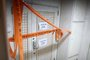

2번 기사
기사 제목 : 쪽방촌 치아 건강 책임지는 '우리동네구강관리플러스센터' 설립 1년 맞아
기사 링크 : https://news.nate.com/view/20250724n41609?mid=n0000


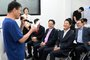

3번 기사
기사 제목 : "방학 맞은 아이들, 북서울꿈의숲·중랑캠핑숲에서 물놀이·문화체험 즐겨요"
기사 링크 : https://news.nate.com/view/20250724n41608?mid=n0000


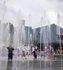

4번 기사
기사 제목 : 옥천 군서면 사거리서 승용차 4대 추돌…5명 부상
기사 링크 : https://news.nate.com/view/20250724n41607?mid=n0000


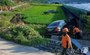

5번 기사
기사 제목 : "요가, 악기 연주하며 '힐링'하니 시민 서비스 품질도 '업'"
기사 링크 : https://news.nate.com/view/20250724n41606?mid=n0000


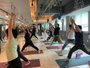

6번 기사
기사 제목 : 대통령실 "전 정부 겨냥 과도한 정책감사 폐지…직권남용죄 수사 최소화"
기사 링크 : https://news.nate.com/view/20250724n41605?mid=n0000


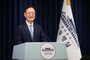

7번 기사
기사 제목 : 폭우 등교길, 여고생에 우산 건넨 시민…현관문 앞서 울컥, 왜?
기사 링크 : https://news.nate.com/view/20250724n41281?mid=n0000


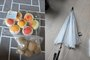

8번 기사
기사 제목 : 미, '2+2 협상' 돌연 연기…시간·내용 압박 커졌다
기사 링크 : https://news.nate.com/view/20250724n41601?mid=n0000


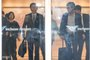

9번 기사
기사 제목 : 대구시의회 예결특위, 2회 추경 11조8117억원 '수정 가결'
기사 링크 : https://news.nate.com/view/20250724n41598?mid=n0000


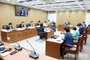

10번 기사
기사 제목 : 명품 화장품 쓰면 명품 피부 될까? "가격보다 나에게 맞는 성분이 중요" [피부과전문의's 더마인사이트]
기사 링크 : https://news.nate.com/view/20250724n36676?mid=n0000


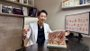

11번 기사
기사 제목 : 태안 1호 골목형 상점가 탄생…안면읍 '백사장항'
기사 링크 : https://news.nate.com/view/20250724n41595?mid=n0000


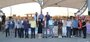

12번 기사
기사 제목 : 총기살해범, 112신고 10분 만에 도주…피해자 1시간 넘게 '방치'
기사 링크 : https://news.nate.com/view/20250724n41594?mid=n0000


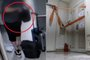

13번 기사
기사 제목 : [영상] "취식 안돼요" 안내하자…편의점 냉동고에 먹던 라면 붓고 떠난 여성
기사 링크 : https://news.nate.com/view/20250724n41593?mid=n0000


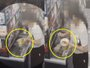

14번 기사
기사 제목 : 아들 사제총기 60대 살해범 "가족회사서 월 300만원 받다 끊겨 배신감"
기사 링크 : https://news.nate.com/view/20250724n41592?mid=n0000


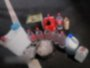

15번 기사
기사 제목 : 정치보복 고리 끊어낼까…이 대통령, '직권남용죄 남용 개선' 지시
기사 링크 : https://news.nate.com/view/20250724n40757?mid=n0000


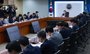

16번 기사
기사 제목 : '대구의 날' 대구고와 경북고, 모두 웃었다…유신고와 서울고는 탈락
기사 링크 : https://news.nate.com/view/20250724n41590?mid=n0000


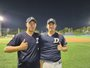

17번 기사
기사 제목 : "날 단장이라 불러라"…노상원, 부정선거 수사단 맡으려 했다
기사 링크 : https://news.nate.com/view/20250724n37478?mid=n0000


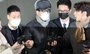

18번 기사
기사 제목 : 박준희 관악구청장 "청년부터 어르신까지 생애주기별 맞춤 정책으로 행복 구현"
기사 링크 : https://news.nate.com/view/20250724n41588?mid=n0000


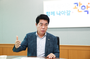

19번 기사
기사 제목 : "배가 부글부글" 기내에서 먹으면 후회하는 음식 6
기사 링크 : https://news.nate.com/view/20250724n41587?mid=n0000


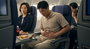

20번 기사
기사 제목 : "비번 못 밝힌다"…송도 총격 피의자, 아이폰 포렌식에 수사 장기화
기사 링크 : https://news.nate.com/view/20250724n40549?mid=n0000


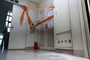

In [84]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
from IPython.display import Image, display


user_input = input("검색할 섹션을 입력하세요. (최신뉴스, 정치, 경제, 사회, 세계, IT/과학)")

section_dict = {'최신뉴스':'n0100', '정치' : 'n0200', '경제' : 'n0300',
                '사회' : 'n0400', '세계': 'n0500', 'IT/과학' : 'n0600'
}

section = section_dict[user_input]

if user_input == '최신뉴스':
    url = 'https://news.nate.com/recent?mid='
else:
    url = 'https://news.nate.com/section?mid=' + section

print(url)

req_header = {
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36'
    }

res = requests.get(url, headers=req_header)

if res.ok:
    html = res.text
    soup = BeautifulSoup(html, "html.parser")

    div = soup.select("div.mlt01")

    for idx, a_tags in enumerate(div):
        a_tags = a_tags.select_one('a.lt1')
        title = a_tags.select_one("h2").text

        article_url = a_tags.get('href')
        article_url_join = urljoin(base="https://", url=article_url, allow_fragments=True)

        img_tag = a_tags.select_one("img")
        if img_tag:
            img_url =img_tag.get('src')
            img_url_join = urljoin(base="https://", url=img_url, allow_fragments=True)

        
        print(f"{idx+1}번 기사")
        print(f"기사 제목 : {title}")
        print(f"기사 링크 : {article_url_join}")
        display(Image(img_url_join))


## 2-2. 하나의 네이버 웹툰과 1개의 회차에 대한 Image 다운로드 하기

In [ ]:
import requests
from bs4 import BeautifulSoup
from IPython.display import Image
import os


def download_one_episode(title, no, url):
    req_header = {
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36'
    }

    res = requests.get(url, headers=req_header)

    img_dir_name = f'../data/img/{title}/{no}' # ..으로 연습문제 디렉토리에서 올라가 data/img/title/no로 경로 지정

    os.makedirs(img_dir_name, exist_ok=True)

    if res.ok:
        html = res.text
        soup = BeautifulSoup(html, 'html.parser')

        divs = soup.select("div.wt_viewer img")
        
        img_url_list = [img['src'] for img in divs]

        for img_url in img_url_list:
            res = requests.get(img_url, headers=req_header)
            if res.ok:
                img_data = res.content
                file_path = os.path.join(img_dir_name, os.path.basename(img_url))
                with open(file_path, 'wb') as file:
                    print(f'Writing to {file_path} ({len(img_data):,} bytes)')
                    file.write(img_data)
            else:
                print(f'Error Code = {res.status_code} for {img_url}')

# title_input, num_input, url_input, week_input = input("제목, 회차번호, 회차 URL을 입력하세요").split()

# download_one_episode(title_input, num_input, url_input, week_input)
download_one_episode('일렉시드',341,'https://comic.naver.com/webtoon/detail?titleId=717481&no=341&week=wed')


## 2-3 하나의 네이버 웹툰과 여러개의 회차에 대한 Image 다운로드 하기

In [ ]:
import requests
from bs4 import BeautifulSoup
import os
from IPython.display import Image


def download_all_episode(title, episode_url):

    req_header = {
        'user-agent' : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.38 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36"
    }

    res = requests.get(episode_url, headers=req_header)
    original_url = 'https://m.comic.naver.com'

    if res.ok:
        html = res.text
        soup = BeautifulSoup(html, 'html.parser')
        
        a_tags = soup.select("ul.section_episode_list li a")
        # print(a_tags) # a_tags를 출력했을때, 미리보기 웹툰인 4개 파일의 href가 #으로 표기됨
        webtoon_url_list = []

        for a_tag in a_tags:
            a_href = a_tag['href']

            start_point = a_href.find('&no=')
            end_point = a_href.find('&week')

            no = a_href[start_point+4:end_point] # &no=가 4글자이기때문에 +4, 쿼리에서 숫자를 꺼내온다.

            if a_href != '#':
                webtoon_url_list.append([no, a_href])

        for number, webtoon_urls in webtoon_url_list:
            ress = requests.get(original_url+webtoon_urls)

            if ress.ok:

                img_dir_name = f'../data/img/{title}/{number}화' # ..으로 상위 디렉토리로 올라가고, data/img/title/no로 저장            
                os.makedirs(img_dir_name, exist_ok=True)
                
                html = ress.text
                soup = BeautifulSoup(html, 'html.parser')

                divs = soup.select("div.toon_view_lst ul li p img")

                for img_tags in divs:
                    img_url = img_tags['data-src']
                    res = requests.get(img_url, headers=req_header)
                    if res.ok:
                        img_data = res.content
                        file_path = os.path.join(img_dir_name, os.path.basename(img_url))
                        with open(file_path, 'wb') as file:
                            print(f'Writing to {file_path} ({len(img_data):,} bytes)')
                            file.write(img_data)
                    else:
                        print(f'Error Code = {res.status_code} for {img_url}')

            


# download_all_episode('배달왕', 'https://comic.naver.com/webtoon/list?titleId=823933')
# 네이버 웹툰 PC 페이지는 CSR 방식이라 request시 JS가 렌더링 되기 전이라 body가 비어있음
download_all_episode('배달왕', 'https://m.comic.naver.com/webtoon/list?titleId=823933&week=thu&sortOrder=DESC&page=1')
# 모바일 페이지는 JS를 최소화해야 속도와 성능을 높인다. 그래서 SSR 방식인 모바일 페이지로 변경
# 모바일로 했던 것을 네트워크에서 JSON 확인 후 API를 알아내 서버에서 JSON 응답받는 형식으로 변경 예정

In [18]:
import requests
from bs4 import BeautifulSoup
import os
from IPython.display import Image
import re


def download_all_episode(title, episode_url):

    req_header = {
        'user-agent' : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.38 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36"
    }

    title_id = re.search(r'titleId=(\d+)', episode_url).group(1)

    page_url = f"https://comic.naver.com/api/article/list?titleId=823933&page=1&sort=DESC" # 여기서 total_page 수를 얻어올 수 있음
    res = requests.get(page_url, headers=req_header)
    total_pages = res.json().get("pageInfo", []).get("totalPages", 1)

    for page in range(1, total_pages+1):
        api_url = f"https://comic.naver.com/api/article/list?titleId={title_id}&page={page}" # network에서 알아낸 웹툰 OO화 목록를 응답하는 서버 API

        res = requests.get(api_url, headers=req_header)

        if not res.ok:
            print(f"API 요청 실패 : {res.status_code}")
            return
        
        data = res.json()
        episodes = data.get("articleList", [])

        for episode in episodes:
            no = episode['no']
            subtitle = episode['subtitle']

            detail_url = f"https://comic.naver.com/webtoon/detail?titleId={title_id}&no={no}&week=thu"  
            detail_res = requests.get(detail_url, headers=req_header)

            if detail_res.ok:
                html = detail_res.text
                soup = BeautifulSoup(html, 'html.parser')

                img_dir_name = f'../data/img/{title}/{subtitle}'
                os.makedirs(img_dir_name, exist_ok=True)
                        
                divs = soup.select("div.wt_viewer img")
            
                img_url_list = [img['src'] for img in divs]

                for img_url in img_url_list:
                    res = requests.get(img_url, headers=req_header)
                    if res.ok:
                        img_data = res.content
                        file_path = os.path.join(img_dir_name, os.path.basename(img_url))
                        with open(file_path, 'wb') as file:
                            print(f'Writing to {file_path} ({len(img_data):,} bytes)')
                            file.write(img_data)
                    else:
                        print(f'Error Code = {res.status_code} for {img_url}')

            


download_all_episode('배달왕', 'https://comic.naver.com/webtoon/list?titleId=823933')
# 네트워크에서 JSON 확인 후 API를 알아내 서버에서 JSON 응답받는 버전

Writing to ../data/img/배달왕/131화\20250712145741_ffb767ece0fef246f356d5522d23d04b_IMAG01_1.jpg (152,992 bytes)
Writing to ../data/img/배달왕/131화\20250712145741_ffb767ece0fef246f356d5522d23d04b_IMAG01_2.jpg (106,086 bytes)
Writing to ../data/img/배달왕/131화\20250712145741_ffb767ece0fef246f356d5522d23d04b_IMAG01_3.jpg (108,566 bytes)
Writing to ../data/img/배달왕/131화\20250712145741_ffb767ece0fef246f356d5522d23d04b_IMAG01_4.jpg (88,787 bytes)
Writing to ../data/img/배달왕/131화\20250712145741_ffb767ece0fef246f356d5522d23d04b_IMAG01_5.jpg (110,208 bytes)
Writing to ../data/img/배달왕/131화\20250712145741_ffb767ece0fef246f356d5522d23d04b_IMAG01_6.jpg (115,783 bytes)
Writing to ../data/img/배달왕/131화\20250712145741_ffb767ece0fef246f356d5522d23d04b_IMAG01_7.jpg (96,629 bytes)
Writing to ../data/img/배달왕/131화\20250712145741_ffb767ece0fef246f356d5522d23d04b_IMAG01_8.jpg (158,125 bytes)
Writing to ../data/img/배달왕/131화\20250712145741_ffb767ece0fef246f356d5522d23d04b_IMAG01_9.jpg (193,657 bytes)
Writing to ../data/im